### Codio Activity 15.11: The Bias Variance Trade-Off

**Expected Time = 30 minutes** 

**Total Points = 30** 

This activity focuses on using the `SGDRegressor` to train differing complexity models.  You will compare models on a synthetic dataset and determine if these are high or low bias and high or low variance based on the residuals of the model.  In this assignment it is important to visualize histograms of the residuals as a method to determine the nature of bias and variance as well as the scatterplot against the model prediction plots provided.


#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

### The Data

Below a fifth degree polynomial function is created and noise added.  You are to compare the error of different model complexities and determine the nature of bias and variance in the model. 

**NOTE**: You are provided the feature data as polynomials for each problem -- there are no interaction terms necessary here and scikitlearn does not have an easy way of eliminating these terms using `PolynomialFeatures`. Also, when evaluating the model please use the test data for describing the variance of the estimator.

In [5]:
def f(x): 
    np.random.seed(42)
    return 14.2*(x + 1)*x*(x - 1)**3 + np.random.normal(scale = 1, size = len(x))

In [7]:
X = np.linspace(-1, 1, 100)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, f(X).reshape(-1, 1), random_state=42)
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
X_ts_scaled = scaler.transform(X_test.reshape(-1, 1))

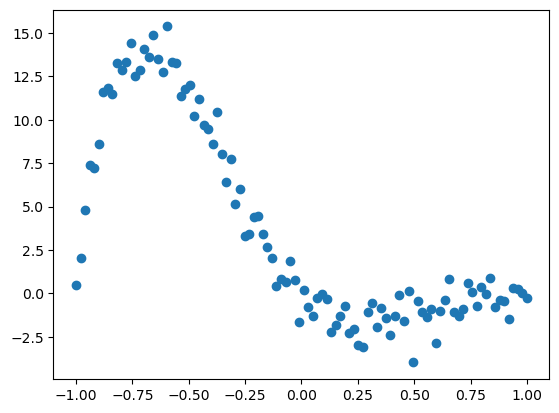

In [11]:
plt.scatter(X, f(X))

In [13]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

[Back to top](#-Index)

### Problem 1

#### Linear Model and Error

**10 Points**

Below, build a first degree model using the scaled data and the `SGDRegressor`.  Plot the results and visualize the errors.  Is this model high bias?  Also, be sure to note the variance of the model.  Enter your solutions as a string corresponding to the correct answer choice for the resulting model.

```
a. High Bias
b. Low Bias
```

In [16]:
scaler = StandardScaler()
#train and test data
X_tr_scaled = scaler.fit_transform(X_train)
X_ts_scaled = scaler.transform(X_test)

In [ ]:
### GRADED
ans1 = 'b'

### ANSWER CHECK
print(ans1)

[Back to top](#-Index)

### Problem 2

#### Quadratic Model and Error

**10 Points**

Below, build a second degree model using the scaled data and the `SGDRegressor`.  Plot the results and visualize the errors.  Is this model high bias?  Is this model higher, lower, or similar variance to that of the linear model?  Enter your solutions as `ans2` as a string corresponding to the correct answer choice for the resulting model.

```
a. High Bias and Higher Variance
b. High Bias and Lower Variance
c. Low Bias and Higher Variance
d. Low Bias and Lower Variance
e. High Bias and Simlilar Variance
f. Low Bias and Similar Variance
```

In [ ]:
k = 2
X_train_quad = np.hstack([X_tr_scaled**(i+1) for i in range(1, k)])
X_test_quad = np.hstack([X_ts_scaled**(i+1) for i in range(1, k)])

In [ ]:
### GRADED
ans2 = 'c'

### ANSWER CHECK
print(ans2)

[Back to top](#-Index)

### Problem 3

#### $5^{th}$ degree Model and Error

**10 Points**

Below, build a fifth degree model using the scaled data and the `SGDRegressor`.  Plot the results and visualize the errors.  Is this model high or low bias?  Is this model higher, lower, or similar variance to that of the **linear model**?  Enter your solutions as a string corresponding to the correct answer choice for the resulting model.

```
a. High Bias and Higher Variance
b. High Bias and Lower Variance
c. Low Bias and Higher Variance
d. Low Bias and Lower Variance
e. High Bias and Simlilar Variance
f. Low Bias and Similar Variance
```

In [ ]:
k = 5
X_train_5 = np.hstack([X_tr_scaled**(i+1) for i in range(1, k)])
X_test_5 = np.hstack([X_ts_scaled**(i+1) for i in range(1, k)])

In [ ]:
### GRADED
ans3 = 'd'

### ANSWER CHECK
print(ans3)

In this example, we manufactured a cubic polynomial and seem to have arrived at a higher complexity model as the optimal choice.  This seems to demonstrate a bit of the idea that going beyond the model complexity may find variance dipping again.  However, please note it took some work to get the parameters of the polynomial in the right place for this to happen -- so sometimes less complexity may be better and sometimes more.  Of greater importance is that you consider how to evaluate and compare the bias and variance in multiple models while building regressors.